In [1]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
seed = 7
numpy.random.seed(seed)


In [3]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [4]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [7]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model


In [9]:
model = baseline_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
history = model.fit(X_train, y_train, nb_epoch=10, validation_split=0.2, shuffle=True)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print(" Error: %.2f%%" % (100-scores[1]*100))
print(model.summary())


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 12s - loss: 0.2820 - acc: 0.9197 - val_loss: 0.1450 - val_acc: 0.9572
Epoch 2/10
 - 13s - loss: 0.1113 - acc: 0.9680 - val_loss: 0.0910 - val_acc: 0.9718
Epoch 3/10
 - 12s - loss: 0.0706 - acc: 0.9792 - val_loss: 0.0961 - val_acc: 0.9690
Epoch 4/10
 - 13s - loss: 0.0500 - acc: 0.9855 - val_loss: 0.0662 - val_acc: 0.9808
Epoch 5/10
 - 12s - loss: 0.0359 - acc: 0.9898 - val_loss: 0.0625 - val_acc: 0.9809
Epoch 6/10
 - 12s - loss: 0.0259 - acc: 0.9934 - val_loss: 0.0590 - val_acc: 0.9807
Epoch 7/10
 - 12s - loss: 0.0200 - acc: 0.9948 - val_loss: 0.0605 - val_acc: 0.9801
Epoch 8/10
 - 12s - loss: 0.0142 - acc: 0.9966 - val_loss: 0.0584 - val_acc: 0.9819
Epoch 9/10
 - 13s - loss: 0.0110 - acc: 0.9977 - val_loss: 0.0589 - val_acc: 0.9819
Epoch 10/10
 - 12s - loss: 0.0078 - acc: 0.9986 - val_loss: 0.0637 - val_acc: 0.9807
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
  160/48000 [..............................] - E

c:\python35\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


48000/48000 [==============================] - 36s 756us/step - loss: 0.0617 - acc: 0.9795 - val_loss: 0.0371 - val_acc: 0.9885
Epoch 2/10
48000/48000 [==============================] - 38s 796us/step - loss: 0.0249 - acc: 0.9915 - val_loss: 0.0446 - val_acc: 0.9852
Epoch 3/10
48000/48000 [==============================] - 39s 803us/step - loss: 0.0175 - acc: 0.9942 - val_loss: 0.0447 - val_acc: 0.9866
Epoch 4/10
48000/48000 [==============================] - 39s 809us/step - loss: 0.0192 - acc: 0.9936 - val_loss: 0.0505 - val_acc: 0.9854
Epoch 5/10
48000/48000 [==============================] - 43s 891us/step - loss: 0.0129 - acc: 0.9959 - val_loss: 0.0642 - val_acc: 0.9830
Epoch 6/10
48000/48000 [==============================] - 43s 904us/step - loss: 0.0142 - acc: 0.9957 - val_loss: 0.0498 - val_acc: 0.9862
Epoch 7/10
48000/48000 [==============================] - 42s 882us/step - loss: 0.0118 - acc: 0.9962 - val_loss: 0.0603 - val_acc: 0.9846
Epoch 8/10
48000/48000 [==============

dict_keys(['val_loss', 'loss', 'val_acc', 'acc'])


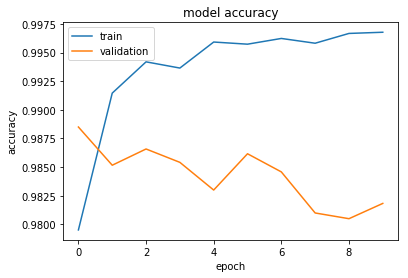

In [10]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

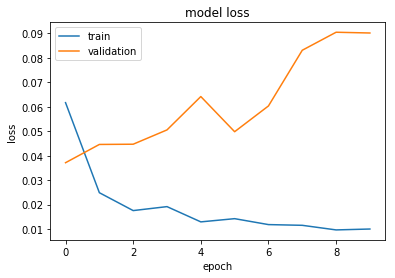

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()